Mounted at /content/drive
Success! Data loaded.

--- Model Performance ---
----------------------------------------
Linear Regression:
  R2:   0.5482
  MAE:  1.5931
  RMSE: 2.2116
----------------------------------------
Random Forest:
  R2:   0.5282
  MAE:  1.5869
  RMSE: 2.2601
----------------------------------------


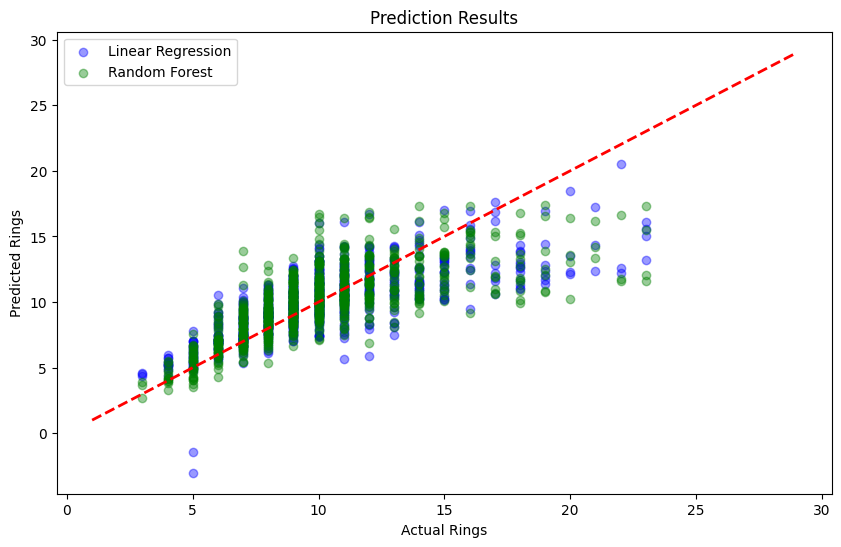

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# ==========================================
# IMPORTANT: UPDATE THE PATH BELOW
# 1. On the left sidebar in Colab, click the Folder icon.
# 2. Go to: drive > My Drive > Abalone_Project (or where you saved it).
# 3. Right-click 'abalone.csv' and select "Copy Path".
# 4. Paste that path inside the quotes below.
# ==========================================
file_path = '/content/drive/MyDrive/Datasets/GrpAssignment/abalone.csv'

# 2. Load Data
try:
    df = pd.read_csv(file_path)
    print("Success! Data loaded.")
except FileNotFoundError:
    print("Error: File not found. Please check the file_path variable above.")

# 3. Preprocessing
# Convert 'Sex' (M, F, I) to numbers using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Define Features (X) and Target (y)
X = df_encoded.drop('Rings', axis=1)
y = df_encoded['Rings']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Run Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 5. Results & Visualization
import numpy as np

print("\n--- Model Performance ---")
print("-" * 40)

# Linear Regression Metrics
lr_r2   = r2_score(y_test, lr_preds)
lr_mae  = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print("Linear Regression:")
print(f"  R2:   {lr_r2:.4f}")
print(f"  MAE:  {lr_mae:.4f}")
print(f"  RMSE: {lr_rmse:.4f}")
print("-" * 40)

# Random Forest Metrics
rf_r2   = r2_score(y_test, rf_preds)
rf_mae  = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print("Random Forest:")
print(f"  R2:   {rf_r2:.4f}")
print(f"  MAE:  {rf_mae:.4f}")
print(f"  RMSE: {rf_rmse:.4f}")
print("-" * 40)

plt.figure(figsize=(10,6))
plt.scatter(y_test, lr_preds, alpha=0.4, label='Linear Regression', color='blue')
plt.scatter(y_test, rf_preds, alpha=0.4, label='Random Forest', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Prediction Results')
plt.legend()
plt.show()